In [39]:
import pandas as pd
import csv
import numpy as np
import time

In [40]:
import  networkx as nx

# G = nx.Graph()
# er = nx.erdos_renyi_graph(100, 0.15)
# ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(40, 1)
# red = nx.random_lobster(20, 0.5, 0.9)
# print(nx.average_degree_connectivity(ba))
# print(nx.number_of_edges(ba))
# print(nx.degree(ba))

In [42]:
print (ba)

In [63]:
import pandas as pd

SRV_CMP_PWR = 1000
SRV_LINK_CAP = 100
RUT_LINK_CAP = 200
#create dataframe
df = pd.DataFrame([], columns=['To', 'From', 'Cost','Cap'])

# Iterate over end nodes:
for v in nx.degree(ba):
    #if node connects only to one neighbour
    if v[1] == 1:

        #mark as endpoint:
        ba.nodes[v[0]]['type'] = 'Endpoint'
        print('node number: ', v[0], ba.nodes[v[0]]['type'])
        # print(ba.nodes[v[0]])

        #add maximum capacity of connection
        adj = list(nx.neighbors(ba, v[0]))
        # print(adj)
        ba[v[0]][adj[0]]['capacity'] = 100
        #--print(ba[v[0]][adj[0]])
    # elif 1<=v[1]<=4:
    #     print('aa')

        #if node has more connection choose whether is Server or router
    else:
        ba.nodes[v[0]]['type'] = 'Router' if v[0] % 2 == 0 else 'Server'
        # print('node number: ', v[0])
        # print(ba.nodes[v[0]])
        adj = list(nx.neighbors(ba, v[0]))
        for neig in adj:
            if ba.nodes[v[0]]['type'] == 'Router':
                ba[v[0]][neig]['capacity'] = RUT_LINK_CAP
                # print(node)
            if ba.nodes[v[0]]['type'] == 'Server':
                ba[v[0]][neig]['capacity'] = SRV_LINK_CAP
                # print(node)

    #--print('node number: ', v[0])
    # print(ba.nodes[v[0]])      
        
        for neig in adj:
                       
           # df = df.append(pd.DataFrame([[v[0],neig,cont,ba[v[0]][neig]]], columns=['To', 'From', 'Cost','Cap']), ignore_index = True) 
            print('for link:' ,v[0],'-',ba.nodes[v[0]]['type'],'|',neig,'-', ba.nodes[neig]['type'],'|','attributes:', ba[v[0]][neig])
            #time.sleep(0.2)

node number:  0 Endpoint
for link: 1 - Server | 0 - Endpoint | attributes: {'capacity': 100}
for link: 1 - Server | 2 - Router | attributes: {'capacity': 100}
for link: 1 - Server | 4 - Endpoint | attributes: {'capacity': 100}
for link: 1 - Server | 7 - Server | attributes: {'capacity': 100}
for link: 1 - Server | 19 - Endpoint | attributes: {'capacity': 100}
for link: 1 - Server | 22 - Router | attributes: {'capacity': 100}
for link: 1 - Server | 27 - Endpoint | attributes: {'capacity': 100}
for link: 1 - Server | 36 - Endpoint | attributes: {'capacity': 100}
for link: 2 - Router | 1 - Server | attributes: {'capacity': 200}
for link: 2 - Router | 3 - Server | attributes: {'capacity': 200}
for link: 2 - Router | 5 - Server | attributes: {'capacity': 200}
for link: 2 - Router | 6 - Endpoint | attributes: {'capacity': 200}
for link: 2 - Router | 10 - Router | attributes: {'capacity': 200}
for link: 2 - Router | 13 - Server | attributes: {'capacity': 200}
for link: 2 - Router | 15 - Endpo

In [55]:
df.head(len(df))

,To,From,Cost,Cap
0,0,1,2,{'capacity': 100}
1,1,0,2,{'capacity': 100}
2,1,2,2,{'capacity': 200}
3,1,4,2,{'capacity': 100}
4,1,7,2,{'capacity': 100}
5,1,19,2,{'capacity': 100}
6,1,22,2,{'capacity': 200}
7,1,27,2,{'capacity': 100}
8,1,36,2,{'capacity': 100}
9,2,1,2,{'capacity': 200}


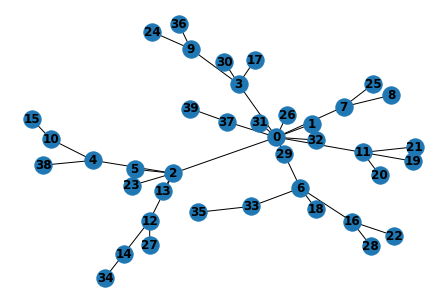

In [33]:
import matplotlib.pyplot as plt
nx.draw(ba,pos=nx.spring_layout(ba), with_labels=True, font_weight='bold')
plt.show()

In [13]:
df = pd.DataFrame([], columns=['A', 'B'])










df2 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), columns=['a', 'b', 'c', 'd', 'e'])
print (df2)
df2.to_csv('example.csv')

with open('person.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(df2)


csvFile.close()

   a  b  c  d  e
0  6  1  8  1  5
1  8  7  8  9  5
2  7  8  0  9  2
3  1  3  2  2  4
4  2  3  4  5  3


In [10]:
df = pd.DataFrame([], columns=['A', 'B'])
df = df.append(pd.DataFrame([[5,9]], columns=['A', 'B']), ignore_index = True) 
df.head(len(df))

,A,B
0,5,9


In [35]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2)
df.head(len(data))

NameError: name 'data' is not defined

In [5]:
try:
    data = pd.read_csv("Dane.csv", delimiter=",", header=0)
except:
    print ("The file does not exists")

The file does not exists


In [2]:
# data cleaning
data["To"] = data["To"].str.strip()
data["From"] = data["From"].str.strip()
#print (data)

In [3]:
#new links 
for i in range(len(data)):
    data.loc[len(data)] = [data['To'][i], data['From'][i], data['Cost'][i], data['Cap'][i]]
#print (data)

In [4]:
# LabelEncoder -> changes categorical data into numerical
#indexa los nodos y los links 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = data['To'].tolist()    #pone los datos de To en el vector labels
labels = labels + data['From'].tolist() #anade los datos de From en un vector
labels = list(set(labels)) #elimina los datos repetidos
#print (labels)
le.fit(labels)   #indexar nodos
data['From_edge'] = le.transform(data['From'])+1 #guardar indices
data['To_edge'] = le.transform(data['To'])+1     #guardar indices
#print (data['From_edge'])
Vn=0
for i in range(len(data)): 
    if Vn <= data['To_edge'][i]:
        Vn = data['To_edge'][i]
    if Vn <= data['From_edge'][i]:
        Vn = data['From_edge'][i]    
#print (Vn)

In [5]:
data['route_id'] = data.index+1
En=0
for i in range(len(data)): 
    if En <= data['route_id'][i]:
        En = data['route_id'][i]
#print (En)

In [6]:
# add route_id
for i, z in enumerate(list(set((data['From'] + data['To']).tolist()))):
    data.loc[(data['From'] == z[:3]) & (data['To'] == z[3:]), ['route_id']] = i   

In [7]:
data.head(len(data))

,From,To,Cost,Cap,From_edge,To_edge,route_id
0,user1-1,node1,5,6,14,6,1
1,user2-1,node1,5,6,19,6,2
2,user3-1,node1,5,6,24,6,3
3,user4-1,node1,5,6,29,6,4
4,user1-2,node2,5,6,15,7,5
5,user2-2,node2,5,6,20,7,6
6,user3-2,node2,5,6,25,7,7
7,user4-2,node2,5,6,30,7,8
8,user1-3,node3,5,6,16,8,9
9,user2-3,node3,5,6,21,8,10


In [8]:
with open("data.dat", "a") as f:
    f.write("""
data;

param Vn := {Vn};
param En := {En};
param Dn := {Dn};

param : h  s  t :=
 1      {h} {s} {t}
;
        """.format(Vn=Vn, En=En, Dn=1, h=1, s=1, t=5))

In [9]:
with open("data.dat", "a") as f:
    f.write("""
param : A :=
""")

    for i in range(En):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['route_id'][i], From_edge_number=data['From_edge'][i]))
    f.write(""";""")

In [10]:
with open("data.dat", "a") as f:
    f.write("""

param : B :=
""")
        
    for i in range(En):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['route_id'][i], to_edge_number=data['To_edge'][i]))
    f.write(""";""")

In [11]:
with open("data.dat", "a") as f:
    f.write("""
     
param : K :=
""")
    for i in range(En):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['route_id'][i], cost=data['Cost'][i]))

In [12]:
with open("data.dat", "a") as f:
     f.write("""
;
end;
""")